In [20]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [21]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float,
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str,
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int,
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('data/kc_house_data.csv',dtype=dtype_dict)
sales = sales.sort(['sqft_living','price'])



/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [27]:
def polynomial_dataframe(data,degree):
    data_frame = pd.DataFrame()
    data_frame['X1'] = data.copy()
    for i in range(2,degree+1):
        data_frame['X'+str(i)] = data_frame['X'+str(i-1)]*data_frame['X1']
    return data_frame

In [28]:
poly15 = polynomial_dataframe(sales['sqft_living'],15)
poly15.head()



,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
19452,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,380.0,144400.0,54872000.0,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,384.0,147456.0,56623104.0,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38


In [29]:
l2_small_penalty = 1.5e-5

In [30]:
ridge_model = sk.linear_model.Ridge(alpha=l2_small_penalty,normalize=True)
ridge_model.fit(poly15,sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [31]:
print ridge_model.coef_

[  1.24873306e+02  -4.77376011e-02   3.01446238e-05  -2.44419942e-09
  -1.94153675e-13   8.54085686e-18   1.51142121e-21   8.27979094e-26
   6.52603100e-31  -3.27895017e-34  -3.87962315e-38  -2.72437650e-42
  -1.07790800e-46   3.78242694e-51   1.39790296e-54]


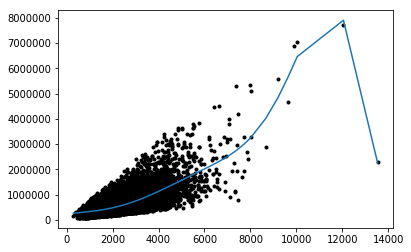

In [33]:
plt.plot(poly15['X1'],sales['price'],'k.',poly15['X1'],ridge_model.predict(poly15))

In [36]:
set1 = pd.read_csv('data/wk3_kc_house_set_1_data.csv')
set2 = pd.read_csv('data/wk3_kc_house_set_2_data.csv')
set3 = pd.read_csv('data/wk3_kc_house_set_3_data.csv')
set4 = pd.read_csv('data/wk3_kc_house_set_4_data.csv')

In [39]:
set1 = set1.sort(['sqft_living','price'])
set2 = set2.sort(['sqft_living','price'])
set3 = set3.sort(['sqft_living','price'])
set4 = set4.sort(['sqft_living','price'])

/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [41]:
poly_set1 = polynomial_dataframe(set1['sqft_living'],15)
poly_set2 = polynomial_dataframe(set2['sqft_living'],15)
poly_set3 = polynomial_dataframe(set3['sqft_living'],15)
poly_set4 = polynomial_dataframe(set4['sqft_living'],15)

In [43]:
l2_small_penalty=1e-9
submodel1 = sk.linear_model.Ridge(alpha=l2_small_penalty,normalize=True)
submodel2 = sk.linear_model.Ridge(alpha=l2_small_penalty,normalize=True)
submodel3 = sk.linear_model.Ridge(alpha=l2_small_penalty,normalize=True)
submodel4 = sk.linear_model.Ridge(alpha=l2_small_penalty,normalize=True)
submodel1.fit(poly_set1,set1['price'])
submodel2.fit(poly_set2,set2['price'])
submodel3.fit(poly_set3,set3['price'])
submodel4.fit(poly_set4,set4['price'])


Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [44]:
print submodel1.coef_
print submodel2.coef_
print submodel3.coef_
print submodel4.coef_


[  6.23857718e+01   1.98235299e-02   7.56558420e-06  -5.91491377e-10
  -1.96217953e-14   1.86865173e-16  -6.62909386e-16   2.79625958e-16
  -1.81062210e-16  -1.24404650e-15   2.30366670e-16   5.06433875e-16
   2.25732230e-16  -3.14308031e-16  -3.32978688e-16]
[ -2.19894686e+02   1.69130364e-01  -2.27849601e-05   1.34431957e-09
  -1.20432513e-14   7.64003745e-16  -4.89141524e-16  -2.93941735e-16
  -6.17970420e-16   3.81800372e-16   5.15069439e-16   8.98788959e-16
   1.08009405e-15  -4.37750733e-16   1.40403443e-15]
[ -1.98970177e+02   1.57531730e-01  -2.04008046e-05   1.26203624e-09
  -1.59074526e-14  -2.70708681e-16  -4.55047514e-16   5.97386817e-16
   4.28518765e-16   5.27358368e-16  -4.79130198e-16   1.20138611e-15
   6.23420738e-16   3.65494169e-16  -3.00231269e-16]
[ -3.48248202e+01   7.33755964e-02  -5.31371126e-06   3.38536611e-10
   3.57683193e-14  -1.23385098e-15  -4.13869228e-16   8.99222180e-16
  -4.98668926e-16  -5.35366910e-16   2.49778932e-16   4.01979504e-16
   3.06323327

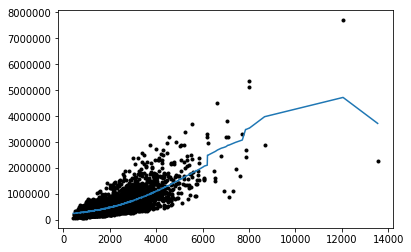

In [45]:
plt.plot(poly_set1['X1'],set1['price'],'k.',poly_set1['X1'],submodel1.predict(poly_set1))

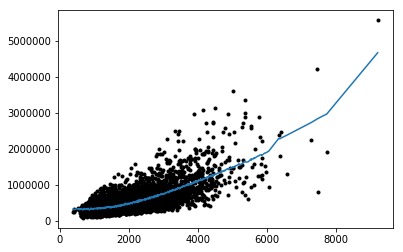

In [46]:
plt.plot(poly_set2['X1'],set2['price'],'k.',poly_set2['X1'],submodel2.predict(poly_set2))

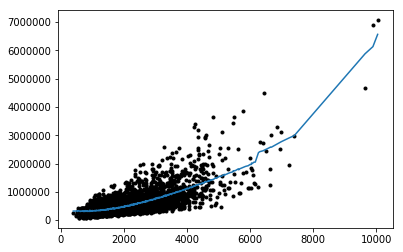

In [47]:
plt.plot(poly_set3['X1'],set3['price'],'k.',poly_set3['X1'],submodel3.predict(poly_set3))

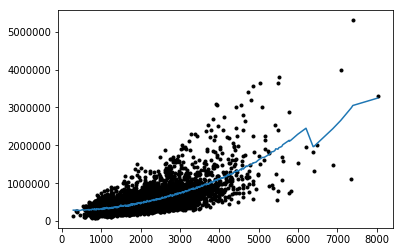

In [48]:
plt.plot(poly_set4['X1'],set4['price'],'k.',poly_set4['X1'],submodel4.predict(poly_set4))

# Ridge regression using large penalty

In [49]:
l2_large_penalty=1.23e2

In [50]:
submodel1 = sk.linear_model.Ridge(alpha=l2_large_penalty,normalize=True)
submodel2 = sk.linear_model.Ridge(alpha=l2_large_penalty,normalize=True)
submodel3 = sk.linear_model.Ridge(alpha=l2_large_penalty,normalize=True)
submodel4 = sk.linear_model.Ridge(alpha=l2_large_penalty,normalize=True)
submodel1.fit(poly_set1,set1['price'])
submodel2.fit(poly_set2,set2['price'])
submodel3.fit(poly_set3,set3['price'])
submodel4.fit(poly_set4,set4['price'])


Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [51]:
print submodel1.coef_
print submodel2.coef_
print submodel3.coef_
print submodel4.coef_

[  2.33302293e+00   3.56038341e-04   3.37288360e-08   2.06040887e-12
   1.36746708e-15  -1.92341983e-17   1.04834390e-17  -9.30269146e-18
  -8.46418543e-18  -1.59248399e-17   9.41566963e-18   1.22423043e-18
   5.91820334e-18  -1.47750360e-17  -2.35836923e-17]
[  2.10772269e+00   3.94453401e-04   6.78444742e-08   9.15014451e-12
   1.94720746e-15  -2.53164281e-17   1.02334725e-17  -4.38033903e-18
  -7.39193953e-18  -1.03274762e-18   8.33154295e-18   4.90077187e-18
  -3.58306755e-18  -1.75676068e-17  -1.57687979e-17]
[  2.31123641e+00   4.20062138e-04   6.28136039e-08   6.89987701e-12
   1.20756329e-15  -1.89793802e-17   5.95314134e-18  -8.07909989e-18
  -5.49082928e-18  -1.34742751e-17   2.35169643e-18  -4.76775704e-18
  -1.73049455e-17  -1.11975184e-17  -3.04976179e-17]
[  2.10018378e+00   4.09722690e-04   7.60925093e-08   1.16346493e-11
   2.52725095e-15  -3.60823239e-17   1.34459584e-17  -1.42653353e-18
  -1.20066039e-17  -7.79542974e-18   1.44429140e-17  -7.79955285e-18
  -2.56592299

# PLOTS AFTER INTRODUCING LARGE PENALTY

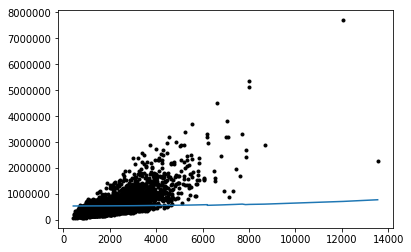

In [52]:
plt.plot(poly_set1['X1'],set1['price'],'k.',poly_set1['X1'],submodel1.predict(poly_set1))

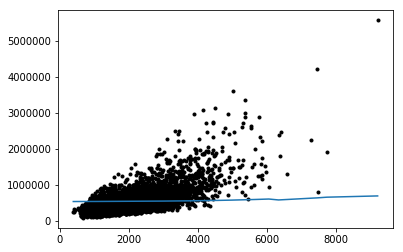

In [53]:
plt.plot(poly_set2['X1'],set2['price'],'k.',poly_set2['X1'],submodel2.predict(poly_set2))

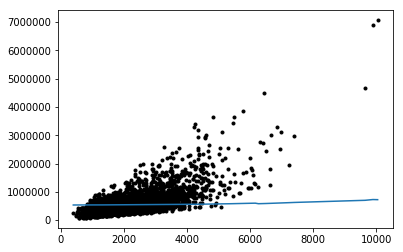

In [54]:
plt.plot(poly_set3['X1'],set3['price'],'k.',poly_set3['X1'],submodel3.predict(poly_set3))

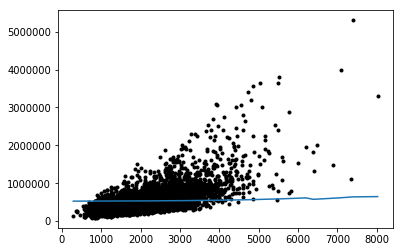

In [55]:
plt.plot(poly_set4['X1'],set4['price'],'k.',poly_set4['X1'],submodel4.predict(poly_set4))

# Observation : For a large value of l2 w approxes to 0 , very small
# All the models appears to be the same

In [65]:
train_valid_shuffled = pd.read_csv('data/wk3_kc_house_train_valid_shuffled.csv',dtype=dtype_dict)
test = pd.read_csv('data/wk3_kc_house_test_data.csv',dtype=dtype_dict)

# 10-K CROSS VALIDATION

In [66]:
n = len(train_valid_shuffled)
k = 10
print n
print n/k
print 
for i in range(10):
    start = (n/k)*i
    end = start + n/k
    print i
    print "START :",start
    print "END :",end

19396
1939

0
START : 0
END : 1939
1
START : 1939
END : 3878
2
START : 3878
END : 5817
3
START : 5817
END : 7756
4
START : 7756
END : 9695
5
START : 9695
END : 11634
6
START : 11634
END : 13573
7
START : 13573
END : 15512
8
START : 15512
END : 17451
9
START : 17451
END : 19390


In [67]:
def validation_train_gen(data,k):
    n = len(data)
    validation = {}
    train = {}
    for i in range(k):
        start = (n/k)*i
        end = (n/k)*(i+1)
        validation[i+1] = data[start:end+1]
        train[i+1] = data[:start].append(data[end+1:n])
    return validation,train

In [68]:
validation,train = validation_train_gen(train_valid_shuffled,10)

# A function to complete k fold cross validation

In [80]:
def k_fold_cross_validation(k,l2_penalty,data,output):
    error = 0
    features = []
    for x in range(1,16):
        features.append('X'+str(x))
    validation,train = validation_train_gen(data,k)
    for x in validation:
        model = sk.linear_model.Ridge(alpha=l2_penalty,normalize=True)
        model.fit(train[x][features],train[x][output])
        OUTPUT = model.predict(validation[x][features])
        error += ((validation[x][output]-OUTPUT)**2).sum()
    return error/k

In [81]:
poly_new_15 = polynomial_dataframe(train_valid_shuffled['sqft_living'],15)
poly_new_15['price'] = train_valid_shuffled['price'].copy()

In [82]:
poly_new_15.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,price
0,2800.0,7840000.0,2.195200e+10,6.146560e+13,1.721037e+17,4.818903e+20,1.349293e+24,3.778020e+27,1.057846e+31,2.961968e+34,8.293509e+37,2.322183e+41,6.502111e+44,1.820591e+48,5.097655e+51,665000.0
1,2490.0,6200100.0,1.543825e+10,3.844124e+13,9.571869e+16,2.383395e+20,5.934654e+23,1.477729e+27,3.679545e+30,9.162067e+33,2.281355e+37,5.680573e+40,1.414463e+44,3.522012e+47,8.769810e+50,645000.0
2,2340.0,5475600.0,1.281290e+10,2.998220e+13,7.015834e+16,1.641705e+20,3.841590e+23,8.989320e+26,2.103501e+30,4.922192e+33,1.151793e+37,2.695196e+40,6.306758e+43,1.475781e+47,3.453328e+50,640000.0
3,1320.0,1742400.0,2.299968e+09,3.035958e+12,4.007464e+15,5.289853e+18,6.982606e+21,9.217040e+24,1.216649e+28,1.605977e+31,2.119890e+34,2.798254e+37,3.693696e+40,4.875678e+43,6.435895e+46,594000.0
4,1904.0,3625216.0,6.902411e+09,1.314219e+13,2.502273e+16,4.764328e+19,9.071281e+22,1.727172e+26,3.288535e+29,6.261371e+32,1.192165e+36,2.269882e+39,4.321856e+42,8.228813e+45,1.566766e+49,365000.0


In [92]:
l2_penalty = np.logspace(3,9,num=13)


In [93]:
for l2 in l2_penalty:
    print "RSS on : ",l2," : ",k_fold_cross_validation(10,l2,poly_new_15,'price')

RSS on :  1000.0  :  2.65143291737e+14
RSS on :  3162.27766017  :  2.6585921076e+14
RSS on :  10000.0  :  2.66090752284e+14
RSS on :  31622.7766017  :  2.66164499076e+14
RSS on :  100000.0  :  2.66187872944e+14
RSS on :  316227.766017  :  2.6619526973e+14
RSS on :  1000000.0  :  2.66197609332e+14
RSS on :  3162277.66017  :  2.66198349232e+14
RSS on :  10000000.0  :  2.66198583215e+14
RSS on :  31622776.6017  :  2.66198657207e+14
RSS on :  100000000.0  :  2.66198680606e+14
RSS on :  316227766.017  :  2.66198688005e+14
RSS on :  1000000000.0  :  2.66198690345e+14


# l2 = 1000 produces least RSS ON THE VALIDATION SET

In [97]:
sales_train = pd.read_csv('data/kc_house_train_data.csv',dtype=dtype_dict)
sales_test = pd.read_csv('data/kc_house_test_data.csv',dtype=dtype_dict)
sales_train = sales_train.sort(['sqft_living','price'])
sales_test = sales_test.sort(['sqft_living','price'])

/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [99]:
poly15_final_train = polynomial_dataframe(sales_train['sqft_living'],15)
poly15_final_test = polynomial_dataframe(sales_test['sqft_living'],15)
l2_final = 1e3
model_final = sk.linear_model.Ridge(alpha=l2_final,normalize=True)
model_final.fit(poly15_final_train,sales_train['price'])

Ridge(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

# Final WEIGHTS BASED ON THE BEST L2_NORM COEFFICIENT 

In [100]:
model_final.coef_

array([  2.81069062e-01,   4.88340096e-05,   5.96794952e-09,
         4.22475366e-13,   2.36154192e-17,   1.31726073e-21,
         7.76349655e-26,   4.81417895e-30,   3.09729655e-34,
         2.04400499e-38,   1.37306760e-42,   9.34290094e-47,
         6.41929917e-51,   4.44448110e-55,   3.09661900e-59])

In [104]:
OUTPUT_FINAL = model_final.predict(poly15_final_test)
Y = sales_test['price']
X = poly15_final_test['X1']
RSS = ((Y - OUTPUT_FINAL)**2).sum()



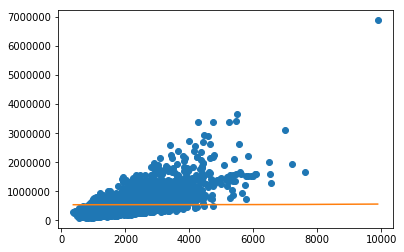

In [105]:
plt.plot(X,Y,'o',X,OUTPUT_FINAL)

In [106]:
print "RSS ON THE TEST DATA IS : ",RSS

RSS ON THE TEST DATA IS :  5.35487711809e+14
